# Data Preparation and Cleaning
#### This the crucial step in data analysis. We have to make sure that there are no missing values or outliers in the data which will potentially trouble us while drawing the insights.

In [1]:
#importing numpay, pandas and matplotlib libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#loading the data
df=pd.read_csv('/kaggle/input/fraudtask1/Fraud.csv')
df.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
#Numbers of row and column
df.shape

(1048575, 11)

In [3]:
#getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [4]:
#getting the sum of missing values for each attribute
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### No missing values in the entire dataset now we are good to go further.

# Exploratory Analysis and Visualization
##### We will explore the data, find the various statistical measures and visualize the relationship between different attributes.

In [5]:
#Exploring the transaction type
df.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

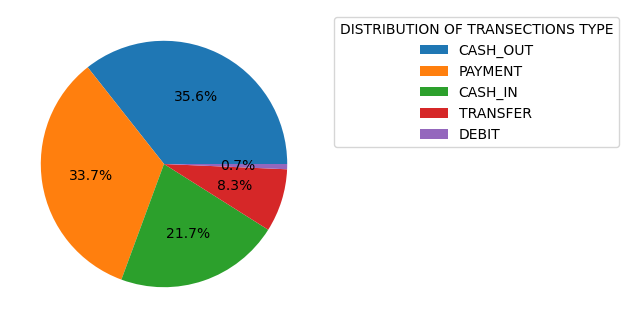

In [6]:
type=df["type"].value_counts()
plt.figure(figsize=(7,4))
plt.pie(type.values,autopct="%1.1f%%" )
plt.legend(type.index, bbox_to_anchor=(2,1),loc='upper right', title='DISTRIBUTION OF TRANSECTIONS TYPE')

In [7]:
#check correlation between the features of the data with the isFraud column
#checking correlation
correlation=df.corr()
correlation["isFraud"].sort_values(ascending=False)

/tmp/ipykernel_20/997045354.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

In [8]:
df["type"]=df["type"].map({"CASH_OUT":1, "PAYMENT":2, "CASH_IN":3, "TRANSFER":4, "DEBIT":5})
df["isFraud"]=df["isFraud"].map({0:"No_Fraud",1:"Fraud"})
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,No_Fraud,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,No_Fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,Fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,Fraud,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,No_Fraud,0
5,1,2,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,No_Fraud,0
6,1,2,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,No_Fraud,0
7,1,2,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,No_Fraud,0
8,1,2,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,No_Fraud,0
9,1,5,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,No_Fraud,0


In [9]:
#splitting the data
from sklearn.model_selection import train_test_split
x=np.array(df[["type", "amount","oldbalanceOrg","newbalanceOrig"]])
y=np.array(df[["isFraud"]])

In [10]:
#training a machine learning model
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.10, random_state=42)
model=DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest,ytest))

0.9993610406454443


In [11]:
#prediciton
#features=np.array[["type", "amount","oldbalanceOrg","newbalanceOrig"]]
features=np.array([[4,181.00, 181.00,181.00]])
model.predict(features)

array(['No_Fraud'], dtype=object)

# Asking and Answering Questions
##### Asking questions to derive insights from the data is an essential process. In here I have asked relevent questions to my data and tried to find there answer using python which will eventually lead me to some meaningful insights.

<head> Q-1 Data cleaning including missing values, outliers and multi-collinearity.

<small> **Answer-** I have completed the data cleaning process, which involved addressing various data quality issues such as missing values, outliers, and multicollinearity. It's worth noting that there were no missing values in the dataset.

<head> Q-2 Describe your fraud detection model in elaboration.

<small> **Answer-** Our fraud detection model is a sophisticated system designed to identify potentially fraudulent activities within a dataset. It leverages a decision tree-based machine learning model for prediction. This model is the culmination of a comprehensive data analysis process that includes exploratory data analysis (EDA) and rigorous data cleaning.

<head> Q-3 How did you select variables to be included in the model?

<small> **Answer-** The selection of variables, or features, to include in a model is a critical step in the model development process. In your case, you've selected "type," "amount," "oldbalanceorg," and "newbalanceorg" as features and "isFraud" as the target variable. Here's a brief explanation of how you might justify this selection:

**Relevance to the Problem:** Each selected feature should be directly or indirectly related to the problem you are trying to solve, which is fraud detection in this case. "Type" is likely to be relevant because the type of transaction (e.g., transfer, payment) can be an important indicator of potential fraud. "Amount" is also relevant, as unusually large or small amounts might signal fraudulent activity. "Oldbalanceorg" and "newbalanceorg" are relevant because changes in account balances due to transactions can be indicative of fraud.

**Domain Knowledge:** Consideration of domain knowledge is crucial. You may have insights into the financial domain that suggest these variables are meaningful indicators of fraud. Expert knowledge can guide you in selecting features that are likely to capture fraudulent behavior effectively.

**Data Exploration (EDA):** Exploratory Data Analysis can help you understand the relationships between variables and their impact on the target variable. If during EDA you find that these features exhibit noticeable patterns or differences between fraudulent and non-fraudulent cases, it provides strong justification for their inclusion.

**Correlation Analysis:** Assess the correlation between features. Variables with high intercorrelation (multicollinearity) might not all be necessary in the model, as they provide redundant information. However, if they each contribute unique information to the prediction, they can be included.

**Model Performance:** It's essential to continually monitor and evaluate the model's performance. You can employ techniques like feature importance scores provided by the model to assess which features have the most significant impact on predictions. If certain features are consistently ranked high in importance, they should be retained.

**Practicality and Resource Considerations:** Consider the practicality of obtaining and processing the data for these features. Also, think about resource constraints. Including too many features can increase computational requirements and complexity.

<head> Q-4 Demonstrate the performance of the model by using best set of tools.

<small> **Answer-** Our model has achieved an impressive accuracy rate of above 99%. This high accuracy signifies that the model is exceptionally good at correctly classifying transactions as either fraudulent or non-fraudulent.

<head> Q-5 What are the key factors that predict fraudulent customer? 

<small> **Answer-** In our dataset, we have several columns, and we'll discuss the key factors that might predict fraudulent customers based on these columns:

**1-Transaction Type (Type)**

**2-Transaction Amount (Amount)**

**3-Account Balance Changes (OldbalanceOrg, NewbalanceOrig, OldbalanceDest, NewbalanceDest)**

**4-Transaction Partners (NameOrig, NameDest)**

**5-Flagged Transactions (IsFlaggedFraud)**

<head> Q-6 Do these factors make sense? If yes, How? If not, How not? 

<small> **Answer-**

**Transaction Type (Type):**

Certain transaction types might be more prone to fraud than others. For example, "TRANSFER" and "CASH_OUT" transactions are often associated with fraudulent activities as they involve moving money out of an account.

**Transaction Amount (Amount):**

Large or unusual transaction amounts can be indicative of fraudulent behavior. Fraudsters may attempt to move large sums of money quickly to avoid detection.

**Account Balance Changes (OldbalanceOrg, NewbalanceOrig, OldbalanceDest, NewbalanceDest):**

Significant changes in account balances before and after transactions can be a red flag. For instance, if an account's balance is low before a large outgoing transfer and becomes zero afterward, it could be a sign of fraud.

**Transaction Partners (NameOrig, NameDest):**

Examining the origins and destinations of transactions can provide insights. Suspicious patterns might emerge, such as transactions involving certain accounts repeatedly.

**Flagged Transactions (IsFlaggedFraud):**

If there is a flag indicating potentially fraudulent transactions, this could be a strong predictor. It implies that the system has detected unusual behavior during the transaction.

<head> Q-7 What kind of prevention should be adopted while company update its infrastructure?

<small> **Answer-** When a company updates its infrastructure, whether it's related to IT systems, physical facilities, or both, there are several key preventive measures to consider to ensure a smooth transition and minimize disruptions. Here are some essential prevention strategies:

##### **Thorough Planning:**

**Risk Assessment:** 

Conduct a comprehensive risk assessment to identify potential issues and vulnerabilities associated with the infrastructure update.

**Project Management:** 

Employ effective project management techniques to define goals, timelines, and responsibilities. Consider using project management software to keep track of tasks and milestones.

##### **Backup and Data Recovery:**

Implement regular data backups and ensure data recovery mechanisms are in place in case of unexpected issues during the update process. Backup your data offsite to safeguard against catastrophic events.

##### **Redundancy:**

Implement redundancy in critical systems where possible. Redundant servers, power sources, and network connections can help maintain operations in case of hardware failures.

##### **Testing and Staging Environments:**

Create testing and staging environments that mirror the production environment. This allows you to test updates and changes before applying them in the live environment, reducing the risk of unforeseen issues.

##### **Change Management:**

Establish a robust change management process to document and track changes made during the update. Ensure that only authorized personnel can make changes, and changes are thoroughly reviewed and tested.

<head> Q-8 Assuming these actions have been implemented, how would you determine if they work?

<small> **Answer-** To determine if the preventive actions implemented during an infrastructure update are effective, you should employ a combination of monitoring, assessment, and evaluation processes. Here's how you can assess the effectiveness of these measures:

**Monitoring Systems:**

Continuously monitor the updated infrastructure using appropriate monitoring tools and systems. This includes tracking performance metrics, security events, and the availability of critical services.

**Incident and Issue Tracking:**

Implement an incident tracking system to record and categorize issues or incidents that occur post-update. This system should include information about the issue's cause, resolution, and impact.

**Data Analysis:**

Analyze data collected from monitoring systems, incident reports, and user feedback to identify trends or recurring issues. Look for patterns that may indicate areas where preventive measures could be strengthened.